In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import time
import random
import math
import os 
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import cv2
import re

#Read data

In [ ]:
img = cv2.imread('drive/MyDrive/DatabaseBackup/anopheles/funestus/complex/JHU-004172_01m.jpg')

In [ ]:
path = 'drive/MyDrive/DatabaseBackup/anopheles/funestus/complex/JHU-004172_01m.jpg'
path.split("/")[-3]

'funestus'

In [ ]:
def read_data(path):
    category = path.split("/")[-1]
    df = pd.DataFrame()
    # anopheles other
    if category == "anopheles": 
        for x in os.walk(path):
            if x[0].split("/")[-2] != "gambiae" and x[0].split("/")[-2] != "funestus":
                file_names = []
                last = ""
                initial = True
                for item in sorted(x[2]):
                    if initial == True:
                        last = item.split("_")[0]
                    if item.split("_")[0] == last:
                        file_names.append(os.path.join(x[0], item))
                    else:
                        df2 = pd.DataFrame([file_names])
                        #print(df2)
                        df = pd.concat([df, df2])
                        file_names.clear()
                        file_names.append(os.path.join(x[0], item))
                    last = item.split("_")[0]
                    initial = False
        
    else: # all other categories

        for x in os.walk(path):
            file_names = []
            last = ""
            initial = True
            for item in sorted(x[2]):
                if initial == True:
                    last = item.split("_")[0]
                if item.split("_")[0] == last:
                    file_names.append(os.path.join(x[0], item))
                else:
                    df2 = pd.DataFrame([file_names])
                    #print(df2)
                    df = pd.concat([df, df2])
                    file_names.clear()
                    file_names.append(os.path.join(x[0], item))
                last = item.split("_")[0]
                initial = False
    return df
    

In [ ]:
d = read_data('drive/MyDrive/DatabaseBackup/anopheles/gambiae')

In [ ]:
print(d)

                                                   0   ...   20
0   drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
0   drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
0   drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
0   drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
0   drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
..                                                ...  ...  ...
0   drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
0   drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
0   drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
0   drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
0   drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN

[330 rows x 21 columns]


In [ ]:
d.to_csv('drive/MyDrive/pretrain_data_path/AG.csv', index = False)

In [ ]:
d2 = read_data('drive/MyDrive/DatabaseBackup/anopheles/funestus')

In [ ]:
print(d2)

                                                   0   ...   19
0   drive/MyDrive/DatabaseBackup/anopheles/funestu...  ...  NaN
0   drive/MyDrive/DatabaseBackup/anopheles/funestu...  ...  NaN
0   drive/MyDrive/DatabaseBackup/anopheles/funestu...  ...  NaN
0   drive/MyDrive/DatabaseBackup/anopheles/funestu...  ...  NaN
0   drive/MyDrive/DatabaseBackup/anopheles/funestu...  ...  NaN
..                                                ...  ...  ...
0   drive/MyDrive/DatabaseBackup/anopheles/funestu...  ...  NaN
0   drive/MyDrive/DatabaseBackup/anopheles/funestu...  ...  NaN
0   drive/MyDrive/DatabaseBackup/anopheles/funestu...  ...  NaN
0   drive/MyDrive/DatabaseBackup/anopheles/funestu...  ...  NaN
0   drive/MyDrive/DatabaseBackup/anopheles/funestu...  ...  NaN

[198 rows x 20 columns]


In [ ]:
d2.to_csv('drive/MyDrive/pretrain_data_path/AF.csv', index = False)

In [ ]:
d3 = read_data('drive/MyDrive/DatabaseBackup/anopheles')

In [ ]:
print(d3)

                                                   0   ...   27
0   drive/MyDrive/DatabaseBackup/anopheles/crucian...  ...  NaN
0   drive/MyDrive/DatabaseBackup/anopheles/crucian...  ...  NaN
0   drive/MyDrive/DatabaseBackup/anopheles/crucian...  ...  NaN
0   drive/MyDrive/DatabaseBackup/anopheles/crucian...  ...  NaN
0   drive/MyDrive/DatabaseBackup/anopheles/crucian...  ...  NaN
..                                                ...  ...  ...
0   drive/MyDrive/DatabaseBackup/anopheles/punctip...  ...  NaN
0   drive/MyDrive/DatabaseBackup/anopheles/punctip...  ...  NaN
0   drive/MyDrive/DatabaseBackup/anopheles/punctip...  ...  NaN
0   drive/MyDrive/DatabaseBackup/anopheles/punctip...  ...  NaN
0   drive/MyDrive/DatabaseBackup/anopheles/punctip...  ...  NaN

[882 rows x 28 columns]


In [ ]:
d3 = d3.sample(frac=1).reset_index(drop=True)
print(d3)

                                                    0   ...   27
0    drive/MyDrive/DatabaseBackup/anopheles/stephen...  ...  NaN
1    drive/MyDrive/DatabaseBackup/anopheles/freebor...  ...  NaN
2    drive/MyDrive/DatabaseBackup/anopheles/spp/JHU...  ...  NaN
3    drive/MyDrive/DatabaseBackup/anopheles/punctip...  ...  NaN
4    drive/MyDrive/DatabaseBackup/anopheles/freebor...  ...  NaN
..                                                 ...  ...  ...
877  drive/MyDrive/DatabaseBackup/anopheles/stephen...  ...  NaN
878  drive/MyDrive/DatabaseBackup/anopheles/coustan...  ...  NaN
879  drive/MyDrive/DatabaseBackup/anopheles/stephen...  ...  NaN
880  drive/MyDrive/DatabaseBackup/anopheles/stephen...  ...  NaN
881  drive/MyDrive/DatabaseBackup/anopheles/stephen...  ...  NaN

[882 rows x 28 columns]


In [ ]:
d3 = d3.head(400)
print(d3)

                                                    0   ...   27
0    drive/MyDrive/DatabaseBackup/anopheles/stephen...  ...  NaN
1    drive/MyDrive/DatabaseBackup/anopheles/freebor...  ...  NaN
2    drive/MyDrive/DatabaseBackup/anopheles/spp/JHU...  ...  NaN
3    drive/MyDrive/DatabaseBackup/anopheles/punctip...  ...  NaN
4    drive/MyDrive/DatabaseBackup/anopheles/freebor...  ...  NaN
..                                                 ...  ...  ...
395  drive/MyDrive/DatabaseBackup/anopheles/punctip...  ...  NaN
396  drive/MyDrive/DatabaseBackup/anopheles/quadrim...  ...  NaN
397  drive/MyDrive/DatabaseBackup/anopheles/stephen...  ...  NaN
398  drive/MyDrive/DatabaseBackup/anopheles/stephen...  ...  NaN
399  drive/MyDrive/DatabaseBackup/anopheles/pseudop...  ...  NaN

[400 rows x 28 columns]


In [ ]:
d3.to_csv('drive/MyDrive/pretrain_data_path/A_other_400.csv', index = False)

In [ ]:
d4 = read_data('drive/MyDrive/DatabaseBackup/culex')

In [ ]:
print(d4)

                                                   0   ...   42
0   drive/MyDrive/DatabaseBackup/culex/coronator/J...  ...  NaN
0   drive/MyDrive/DatabaseBackup/culex/coronator/J...  ...  NaN
0   drive/MyDrive/DatabaseBackup/culex/coronator/J...  ...  NaN
0   drive/MyDrive/DatabaseBackup/culex/coronator/J...  ...  NaN
0   drive/MyDrive/DatabaseBackup/culex/coronator/J...  ...  NaN
..                                                ...  ...  ...
0   drive/MyDrive/DatabaseBackup/culex/tarsalis/JH...  ...  NaN
0   drive/MyDrive/DatabaseBackup/culex/tarsalis/JH...  ...  NaN
0   drive/MyDrive/DatabaseBackup/culex/tarsalis/JH...  ...  NaN
0   drive/MyDrive/DatabaseBackup/culex/tarsalis/JH...  ...  NaN
0   drive/MyDrive/DatabaseBackup/culex/tarsalis/JH...  ...  NaN

[647 rows x 43 columns]


In [ ]:
d4 = d4.sample(frac=1).reset_index(drop=True)
d4 = d4.head(420)
print(d4)

                                                    0   ...   42
0    drive/MyDrive/DatabaseBackup/culex/nigripalpus...  ...  NaN
1    drive/MyDrive/DatabaseBackup/culex/salinarius/...  ...  NaN
2    drive/MyDrive/DatabaseBackup/culex/quinquefasc...  ...  NaN
3    drive/MyDrive/DatabaseBackup/culex/nigripalpus...  ...  NaN
4    drive/MyDrive/DatabaseBackup/culex/coronator/J...  ...  NaN
..                                                 ...  ...  ...
415  drive/MyDrive/DatabaseBackup/culex/quinquefasc...  ...  NaN
416  drive/MyDrive/DatabaseBackup/culex/quinquefasc...  ...  NaN
417  drive/MyDrive/DatabaseBackup/culex/quinquefasc...  ...  NaN
418  drive/MyDrive/DatabaseBackup/culex/quinquefasc...  ...  NaN
419  drive/MyDrive/DatabaseBackup/culex/pipiens/JHU...  ...  NaN

[420 rows x 43 columns]


In [ ]:
d4.to_csv('drive/MyDrive/pretrain_data_path/culex_420.csv', index = False)

In [ ]:
d5 = read_data('drive/MyDrive/DatabaseBackup/mansonia')

In [ ]:
d6 = read_data('drive/MyDrive/DatabaseBackup/aedes')

In [ ]:
print(d5)
print(d6)

                                                  0   ...                                                 22
0  drive/MyDrive/DatabaseBackup/mansonia/titillan...  ...                                                NaN
0  drive/MyDrive/DatabaseBackup/mansonia/titillan...  ...                                                NaN
0  drive/MyDrive/DatabaseBackup/mansonia/titillan...  ...                                                NaN
0  drive/MyDrive/DatabaseBackup/mansonia/titillan...  ...                                                NaN
0  drive/MyDrive/DatabaseBackup/mansonia/titillan...  ...                                                NaN
0  drive/MyDrive/DatabaseBackup/mansonia/titillan...  ...                                                NaN
0  drive/MyDrive/DatabaseBackup/mansonia/titillan...  ...                                                NaN
0  drive/MyDrive/DatabaseBackup/mansonia/titillan...  ...                                                NaN
0  drive/MyDrive/Da

In [ ]:
d7 = pd.concat([d5, d6])
print(d7)

                                                   0   ...   58
0   drive/MyDrive/DatabaseBackup/mansonia/titillan...  ...  NaN
0   drive/MyDrive/DatabaseBackup/mansonia/titillan...  ...  NaN
0   drive/MyDrive/DatabaseBackup/mansonia/titillan...  ...  NaN
0   drive/MyDrive/DatabaseBackup/mansonia/titillan...  ...  NaN
0   drive/MyDrive/DatabaseBackup/mansonia/titillan...  ...  NaN
..                                                ...  ...  ...
0   drive/MyDrive/DatabaseBackup/aedes/taeniorhync...  ...  NaN
0   drive/MyDrive/DatabaseBackup/aedes/taeniorhync...  ...  NaN
0   drive/MyDrive/DatabaseBackup/aedes/taeniorhync...  ...  NaN
0   drive/MyDrive/DatabaseBackup/aedes/taeniorhync...  ...  NaN
0   drive/MyDrive/DatabaseBackup/aedes/taeniorhync...  ...  NaN

[1113 rows x 59 columns]


In [ ]:
d7 = d7.sample(frac=1).reset_index(drop=True)
d7 = d7.head(350)
print(d7)

                                                    0   ...   58
0    drive/MyDrive/DatabaseBackup/mansonia/titillan...  ...  NaN
1    drive/MyDrive/DatabaseBackup/aedes/sollicitans...  ...  NaN
2    drive/MyDrive/DatabaseBackup/aedes/albopictus/...  ...  NaN
3    drive/MyDrive/DatabaseBackup/aedes/japonicus/J...  ...  NaN
4    drive/MyDrive/DatabaseBackup/aedes/spp/JHU-005...  ...  NaN
..                                                 ...  ...  ...
345  drive/MyDrive/DatabaseBackup/aedes/canadensis/...  ...  NaN
346  drive/MyDrive/DatabaseBackup/aedes/sollicitans...  ...  NaN
347  drive/MyDrive/DatabaseBackup/aedes/taeniorhync...  ...  NaN
348  drive/MyDrive/DatabaseBackup/aedes/taeniorhync...  ...  NaN
349  drive/MyDrive/DatabaseBackup/aedes/aegypti/JHU...  ...  NaN

[350 rows x 59 columns]


In [ ]:
d7.to_csv('drive/MyDrive/pretrain_data_path/other_350.csv', index = False)

In [ ]:
for x in os.walk('drive/MyDrive/DatabaseBackup/anopheles'):
    print(x[0].split("/")[-2])

DatabaseBackup
anopheles
crucians
crucians
crucians
crucians
crucians
crucians
anopheles
anopheles
anopheles
anopheles
gambiae
gambiae
gambiae
gambiae
anopheles
anopheles
anopheles
cf-coustani
anopheles
anopheles
funestus
funestus
funestus
anopheles
anopheles
anopheles
anopheles
anopheles
anopheles
anopheles
anopheles
anopheles


drive/MyDrive/DatabaseBackup/anopheles/
drive/MyDrive/DatabaseBackup/anopheles/crucians
drive/MyDrive/DatabaseBackup/anopheles/crucians/a
drive/MyDrive/DatabaseBackup/anopheles/crucians/c
drive/MyDrive/DatabaseBackup/anopheles/crucians/e
drive/MyDrive/DatabaseBackup/anopheles/crucians/complex
drive/MyDrive/DatabaseBackup/anopheles/crucians/b
drive/MyDrive/DatabaseBackup/anopheles/crucians/d
drive/MyDrive/DatabaseBackup/anopheles/pharoensis
drive/MyDrive/DatabaseBackup/anopheles/coustani
drive/MyDrive/DatabaseBackup/anopheles/maculipalpis
drive/MyDrive/DatabaseBackup/anopheles/gambiae
drive/MyDrive/DatabaseBackup/anopheles/gambiae/arabiensis
drive/MyDrive/DatabaseBackup/anopheles/gambiae/coluzzii
drive/MyDrive/DatabaseBackup/anopheles/gambiae/complex
drive/MyDrive/DatabaseBackup/anopheles/gambiae/ss
drive/MyDrive/DatabaseBackup/anopheles/pretoriensis
drive/MyDrive/DatabaseBackup/anopheles/freeborni
drive/MyDrive/DatabaseBackup/anopheles/cf-coustani
drive/MyDrive/DatabaseBackup/anopheles

34

['JHU-000289_05d.jpg',
 'JHU-000300_01m.jpg',
 'JHU-000300_09d.jpg',
 'JHU-000289_02d.jpg',
 'JHU-000289_04d.jpg',
 'JHU-000289_03m.jpg',
 'JHU-000289_04m.jpg',
 'JHU-000289_07d.jpg',
 'JHU-001162_01p.jpg',
 'JHU-000288_03m.jpg',
 'JHU-000289_05m.jpg',
 'JHU-000300_06m.jpg',
 'JHU-000288_05d.jpg',
 'JHU-001162_03m.jpg',
 'JHU-000300_02d.jpg',
 'JHU-000300_03m.jpg',
 'JHU-000288_07d.jpg',
 'JHU-001162_03p.jpg',
 'JHU-000300_05d.jpg',
 'JHU-000300_07d.jpg',
 'JHU-000300_01d.jpg',
 'JHU-000289_08d.jpg',
 'JHU-000288_03d.jpg',
 'JHU-000300_06d.jpg',
 'JHU-000289_09d.jpg',
 'JHU-000300_05m.jpg',
 'JHU-000289_02m.jpg',
 'JHU-000288_01m.jpg',
 'JHU-000300_08d.jpg',
 'JHU-000289_06d.jpg',
 'JHU-001162_02p.jpg',
 'JHU-000289_01m.jpg',
 'JHU-000300_03d.jpg',
 'JHU-000300_04d.jpg',
 'JHU-001162_01m.jpg',
 'JHU-000289_01d.jpg',
 'JHU-000300_10d.jpg',
 'JHU-000288_02m.jpg',
 'JHU-000288_04d.jpg',
 'JHU-001162_02m.jpg',
 'JHU-000289_03d.jpg',
 'JHU-000288_06d.jpg',
 'JHU-000288_01d.jpg',
 'JHU-00030

# Train_test_split

In [ ]:
# if need to read data path
d = pd.read_csv('drive/MyDrive/pretrain_data_path/AG.csv')
d2 = pd.read_csv('drive/MyDrive/pretrain_data_path/AF.csv')
d3 = pd.read_csv('drive/MyDrive/pretrain_data_path/A_other_400.csv')
d4 = pd.read_csv('drive/MyDrive/pretrain_data_path/culex_420.csv')
d5 = pd.read_csv('drive/MyDrive/pretrain_data_path/other_350.csv')

In [ ]:
print(d)
print(d4)

                                                     0  ...   20
0    drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
1    drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
2    drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
3    drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
4    drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
..                                                 ...  ...  ...
325  drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
326  drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
327  drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
328  drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
329  drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN

[330 rows x 21 columns]
                                                     0  ...   42
0    drive/MyDrive/DatabaseBackup/culex/nigripalpus...  ...  NaN
1    drive/MyDrive/DatabaseBackup/culex/salinarius/...  ...  NaN


In [ ]:
from sklearn.model_selection import train_test_split
train_data1, test_data1 = train_test_split(d, test_size=0.2)
train_data2, test_data2 = train_test_split(d2, test_size=0.2)
train_data3, test_data3 = train_test_split(d3, test_size=0.2)
train_data4, test_data4 = train_test_split(d4, test_size=0.2)
train_data5, test_data5 = train_test_split(d5, test_size=0.2)

In [ ]:
print(train_data1)
print(test_data5)

                                                     0  ...   20
154  drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
155  drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
137  drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
164  drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
210  drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
..                                                 ...  ...  ...
102  drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
100  drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
66   drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
141  drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN
153  drive/MyDrive/DatabaseBackup/anopheles/gambiae...  ...  NaN

[264 rows x 21 columns]
                                                     0  ...  58
177  drive/MyDrive/DatabaseBackup/aedes/vexans/JHU-...  ... NaN
22   drive/MyDrive/DatabaseBackup/aedes/taeniorhync...  ... NaN
272

In [ ]:
from torchvision import transforms
mosquito_transforms = transforms.Compose([
    #transforms.ToPILImage(),
    transforms.Resize([299,299]),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [ ]:
train_data6, test_data6 = train_test_split(test_data5, test_size=0.2)
print(train_data6.shape)

(56, 59)


In [ ]:
train_data6 = seperate_df_and_label(train_data6)
test_data6 = seperate_df_and_label(test_data6)

In [ ]:
train_data6

,path,label
0,drive/MyDrive/DatabaseBackup/aedes/trivittatus...,4
1,drive/MyDrive/DatabaseBackup/aedes/trivittatus...,4
2,drive/MyDrive/DatabaseBackup/aedes/trivittatus...,4
3,drive/MyDrive/DatabaseBackup/aedes/trivittatus...,4
4,drive/MyDrive/DatabaseBackup/aedes/trivittatus...,4
...,...,...
279,drive/MyDrive/DatabaseBackup/aedes/japonicus/J...,4
280,drive/MyDrive/DatabaseBackup/aedes/japonicus/J...,4
281,drive/MyDrive/DatabaseBackup/aedes/japonicus/J...,4
282,drive/MyDrive/DatabaseBackup/aedes/japonicus/J...,4


In [ ]:
test_data6

,path,label
0,drive/MyDrive/DatabaseBackup/aedes/aegypti/JHU...,4
1,drive/MyDrive/DatabaseBackup/aedes/aegypti/JHU...,4
2,drive/MyDrive/DatabaseBackup/aedes/aegypti/JHU...,4
3,drive/MyDrive/DatabaseBackup/aedes/aegypti/JHU...,4
4,drive/MyDrive/DatabaseBackup/aedes/aegypti/JHU...,4
5,drive/MyDrive/DatabaseBackup/aedes/infirmatus/...,4
6,drive/MyDrive/DatabaseBackup/aedes/infirmatus/...,4
7,drive/MyDrive/DatabaseBackup/aedes/infirmatus/...,4
8,drive/MyDrive/DatabaseBackup/aedes/infirmatus/...,4
9,drive/MyDrive/DatabaseBackup/aedes/infirmatus/...,4


In [ ]:
train_data6.to_csv('drive/MyDrive/pretrain_data_path/train_other_path.csv', index = False)
test_data6.to_csv('drive/MyDrive/pretrain_data_path/test_other_path.csv', index = False)

In [ ]:
def read_data(path):
    data = []
    label = []
    for i in range(path.shape[0]):
        image = Image.open(path.loc[i,'path'])
        image = mosquito_transforms(image)
        data.append(image)
    stacked_data = torch.stack(data)
    label = path.loc[:,'label']
    return stacked_data, label


In [ ]:
train_other_data, train_other_label = read_data(train_data6)
test_other_data, test_other_label = read_data(test_data6)
print(train_other_data.shape)
print(test_other_data.shape)

torch.Size([284, 3, 299, 299])
torch.Size([55, 3, 299, 299])


In [ ]:
print(torch.tensor(train_other_label).shape)
print(torch.tensor(test_other_label).shape)

torch.Size([284])
torch.Size([55])


In [ ]:
#torch.save(train_other_data, "drive/MyDrive/pretrain_data_path/train_other_data.pt")
#torch.save(torch.tensor(train_other_label), "drive/MyDrive/pretrain_data_path/train_other_label.pt")
#torch.save(test_other_data, "drive/MyDrive/pretrain_data_path/test_other_data.pt")
torch.save(torch.tensor(test_other_label), "drive/MyDrive/pretrain_data_path/test_other_label.pt")

In [ ]:
train_data = pd.concat([train_data1, train_data2, train_data3, train_data4, train_data5], ignore_index=True)
test_data = pd.concat([test_data1, test_data2, test_data3, test_data4, test_data5], ignore_index=True)
print(train_data.shape)
print(test_data.shape)

(1358, 59)
(340, 59)


In [ ]:
train_data = train_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)
print(train_data.shape)
print(test_data.shape)

(1358, 59)
(340, 59)


In [ ]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,drive/MyDrive/DatabaseBackup/aedes/aegypti/JHU...,drive/MyDrive/DatabaseBackup/aedes/aegypti/JHU...,drive/MyDrive/DatabaseBackup/aedes/aegypti/JHU...,drive/MyDrive/DatabaseBackup/aedes/aegypti/JHU...,drive/MyDrive/DatabaseBackup/aedes/aegypti/JHU...,drive/MyDrive/DatabaseBackup/aedes/aegypti/JHU...,drive/MyDrive/DatabaseBackup/aedes/aegypti/JHU...,drive/MyDrive/DatabaseBackup/aedes/aegypti/JHU...,drive/MyDrive/DatabaseBackup/aedes/aegypti/JHU...,drive/MyDrive/DatabaseBackup/aedes/aegypti/JHU...,drive/MyDrive/DatabaseBackup/aedes/aegypti/JHU...,drive/MyDrive/DatabaseBackup/aedes/aegypti/JHU...,drive/MyDrive/DatabaseBackup/aedes/aegypti/JHU...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,drive/MyDrive/DatabaseBackup/anopheles/stephen...,drive/MyDrive/DatabaseBackup/anopheles/stephen...,drive/MyDrive/DatabaseBackup/anopheles/stephen...,drive/MyDrive/DatabaseBackup/anopheles/stephen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,drive/MyDrive/DatabaseBackup/anopheles/freebor...,drive/MyDrive/DatabaseBackup/anopheles/freebor...,drive/MyDrive/DatabaseBackup/anopheles/freebor...,drive/MyDrive/DatabaseBackup/anopheles/freebor...,drive/MyDrive/DatabaseBackup/anopheles/freebor...,drive/MyDrive/DatabaseBackup/anopheles/freebor...,drive/MyDrive/DatabaseBackup/anopheles/freebor...,drive/MyDrive/DatabaseBackup/anopheles/freebor...,drive/MyDrive/DatabaseBackup/anopheles/freebor...,drive/MyDrive/DatabaseBackup/anopheles/freebor...,drive/MyDrive/DatabaseBackup/anopheles/freebor...,drive/MyDrive/DatabaseBackup/anopheles/freebor...,drive/MyDrive/DatabaseBackup/anopheles/freebor...,drive/MyDrive/DatabaseBackup/anopheles/freebor...,drive/MyDrive/DatabaseBackup/anopheles/freebor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,drive/MyDrive/DatabaseBackup/anopheles/gambiae...,drive/MyDrive/DatabaseBackup/anopheles/gambiae...,drive/MyDrive/DatabaseBackup/anopheles/gambiae...,drive/MyDrive/DatabaseBackup/anopheles/gambiae...,drive/MyDrive/DatabaseBackup/anopheles/gambiae...,drive/MyDrive/DatabaseBackup/anopheles/gambiae...,drive/MyDrive/DatabaseBackup/anopheles/gambiae...,drive/MyDrive/DatabaseBackup/anopheles/gambiae...,drive/MyDrive/DatabaseBackup/anopheles/gambiae...,drive/MyDrive/DatabaseBackup/anopheles/gambiae...,drive/MyDrive/DatabaseBackup/anopheles/gambiae...,drive/MyDrive/DatabaseBackup/anopheles/gambiae...,drive/MyDrive/DatabaseBackup/anopheles/gambiae...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,drive/MyDrive/DatabaseBackup/culex/restuans/JH...,drive/MyDrive/DatabaseBackup/culex/restuans/JH...,drive/MyDrive/DatabaseBackup/culex/restuans/JH...,drive/MyDrive/DatabaseBackup/culex/restuans/JH...,drive/MyDrive/DatabaseBackup/culex/restuans/JH...,drive/MyDrive/DatabaseBackup/culex/restuans/JH...,drive/MyDrive/DatabaseBackup/culex/restuans/JH...,drive/MyDrive/DatabaseBackup/culex/restuans/JH...,drive/MyDrive/DatabaseBackup/culex/restuans/JH...,drive/MyDrive/DatabaseBackup/culex/restuans/JH...,drive/MyDrive/DatabaseBackup/culex/restuans/JH...,drive/MyDrive/DatabaseBackup/culex/restuans/JH...,drive/MyDrive/DatabaseBackup/culex/restuans/JH...,drive/MyDrive/DatabaseBackup/culex/restuans/JH...,drive/MyDrive/DatabaseBackup/culex/restuans/JH...,drive/MyDrive/DatabaseBackup/culex/restuans/JH...,drive/My

In [ ]:
from PIL import Image, ImageOps

def seperate_df_and_label(df):
    data_list = []
    label_list = []
    df_return = pd.DataFrame()
    
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            if pd.isnull(df.iloc[i,j]) == False:
                #img = Image.open(df.iloc[i,j])
                #img = ImageOps.grayscale(img)
                #df.iloc[i,j].endswith('m.jpg')
                if  df.iloc[i,j].endswith('d.jpg'):
                    data_list.append(df.iloc[i,j])
                    if df.iloc[i,j].split("/")[3] == "anopheles":
                        if df.iloc[i,j].split("/")[4] == "gambiae":
                            label_list.append(0)
                        elif df.iloc[i,j].split("/")[4] == "funestus":
                            label_list.append(1)
                        else:
                            label_list.append(2)
                    elif df.iloc[i,j].split("/")[3] == "culex":
                        label_list.append(3)
                    else:
                        label_list.append(4)
    df_return['path'] = data_list
    df_return['label'] = label_list
s
    return df_return

In [ ]:
train_data_new= seperate_df_and_label(train_data)

In [ ]:
train_data_new.to_csv('drive/MyDrive/pretrain_data_path/train2.csv', index = False)

In [ ]:
test_data_new = seperate_df_and_label(test_data)

In [ ]:
test_data_new

,path,label
0,drive/MyDrive/DatabaseBackup/anopheles/gambiae...,0
1,drive/MyDrive/DatabaseBackup/anopheles/gambiae...,0
2,drive/MyDrive/DatabaseBackup/anopheles/gambiae...,0
3,drive/MyDrive/DatabaseBackup/anopheles/gambiae...,0
4,drive/MyDrive/DatabaseBackup/anopheles/gambiae...,0
...,...,...
2345,drive/MyDrive/DatabaseBackup/aedes/flavescens/...,4
2346,drive/MyDrive/DatabaseBackup/culex/quinquefasc...,3
2347,drive/MyDrive/DatabaseBackup/culex/quinquefasc...,3
2348,drive/MyDrive/DatabaseBackup/culex/quinquefasc...,3


In [ ]:
test_data_new.to_csv('drive/MyDrive/pretrain_data_path/test2.csv', index = False)

# Train and test

In [ ]:
# if need to read train and test datapath 
train_df = pd.read_csv('drive/MyDrive/pretrain_data_path/train2.csv')
test_df = pd.read_csv('drive/MyDrive/pretrain_data_path/test2.csv')

In [ ]:
print(train_df.shape)
print(test_df.shape)

(9551, 2)
(2350, 2)


In [ ]:
from PIL import Image
from torch.utils.data import Dataset
class MosquitoDataset(Dataset):
    def __init__(self, data_df, transform=None):
        
        self.transform = transform
        data_df.sample(frac = 1).reset_index(inplace=True, drop=True)
        # shuffle the paths
        self.data_df = data_df

    def __len__(self):
        return self.data_df.shape[0]

    def __getitem__(self, idx):
        
        img_path = self.data_df.loc[idx,'path']
        #image = cv2.imread(img_path)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = Image.open(img_path)

        label = self.data_df.loc[idx,'label']

        if self.transform:
            image = self.transform(image)
        
        return image, label

In [ ]:
from torchvision import transforms
mosquito_transforms = transforms.Compose([
    #transforms.ToPILImage(),
    transforms.Resize([299,299]),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [ ]:
train_dataset = MosquitoDataset(train_df, mosquito_transforms)
test_dataset = MosquitoDataset(test_df, mosquito_transforms)

In [ ]:
train_dataset[1]

(tensor([[[-1.4329, -1.3987, -1.3815,  ..., -0.7479, -0.7479, -0.7993],
          [-1.3987, -1.3987, -1.3815,  ..., -0.7137, -0.7137, -0.7822],
          [-1.3644, -1.3644, -1.3473,  ..., -0.7137, -0.7479, -0.8507],
          ...,
          [ 0.3138,  0.3481,  0.3823,  ...,  0.2282,  0.2111,  0.2111],
          [ 0.3138,  0.3481,  0.3823,  ...,  0.2282,  0.2111,  0.2282],
          [ 0.3138,  0.3481,  0.3823,  ...,  0.2111,  0.2282,  0.2453]],
 
         [[-1.3529, -1.3529, -1.3704,  ..., -0.9328, -0.9328, -0.9853],
          [-1.3529, -1.3529, -1.3704,  ..., -0.8978, -0.8978, -0.9678],
          [-1.3529, -1.3529, -1.3529,  ..., -0.8978, -0.9328, -1.0378],
          ...,
          [ 0.2052,  0.2402,  0.2927,  ...,  0.0651,  0.0476,  0.0476],
          [ 0.2052,  0.2402,  0.2927,  ...,  0.0651,  0.0476,  0.0651],
          [ 0.2052,  0.2402,  0.2927,  ...,  0.0476,  0.0651,  0.0826]],
 
         [[-1.2119, -1.2119, -1.2119,  ..., -0.5321, -0.5321, -0.5844],
          [-1.2119, -1.2119,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


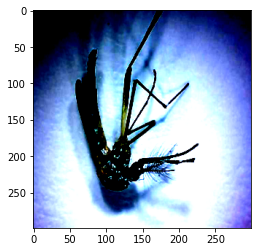

In [ ]:
im = train_dataset[7][0]
plt.imshow(im.permute(1, 2, 0))

In [ ]:
from torch.utils.data import DataLoader,WeightedRandomSampler

target_list = torch.tensor(train_df['label'])
print(target_list.shape)
class_count = np.array([len(np.where(target_list == t)[0]) for t in np.unique(target_list)])
print(class_count)
class_weights = 1./torch.tensor(class_count, dtype=torch.float)
print(class_weights)
class_weights_all = class_weights[target_list]
print(class_weights_all.shape)
weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all)
    )

torch.Size([9551])
[1187  806 2181 2770 2607]
tensor([0.0008, 0.0012, 0.0005, 0.0004, 0.0004])
torch.Size([9551])


In [ ]:
train_dataloader = DataLoader(train_dataset, sampler=weighted_sampler, batch_size=100)
#valid_dataloader = DataLoader(valid_dataset ,batch_size=32, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=100)

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print ("running on the GPU")
else:
    device = torch.device("cpu")
    print ("running on the cpu")

running on the GPU


In [ ]:
from torchvision import models
model = models.resnet34(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 5)
model = model.to(device)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
from torchvision import models
model = models.inception_v3(pretrained=True)
model.fc = nn.Linear(2048, 5)
model.AuxLogits.fc = nn.Linear(768, 5)
model = model.to(device)

In [ ]:
from torchvision import models
model = models.inception_v3(pretrained=True)
model.fc = nn.Linear(2048, 5)
model.AuxLogits.fc = nn.Linear(768, 5)
model.load_state_dict(torch.load('drive/MyDrive/pretrain_data_path/pretrain_Inception1.pt'))
model = model.to(device)

In [ ]:
EPOCHS = 7
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(model.parameters(), lr=0.001, weight_decay = 1e-4)
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.15)
optimizer = optim.Adam(model.parameters(),lr = 1e-4, weight_decay = 1e-4)
#optimizer = optim.Adam(net.parameters(), lr = 1e-6, weight_decay = 1e-4)

In [ ]:
def train(model):
    train_loss = []
    valid_loss = []
    train_acc = []
    valid_acc = []

    for epoch in range (EPOCHS+1):

        correct = 0
        total = 0
        train_ave_loss = 0
        model.train()
        for batch_X, batch_Y in train_dataloader:
            
            batch_X = batch_X.to(device)
            batch_Y = batch_Y.to(device)

            # zero gradient
            optimizer.zero_grad()
            # pass through
            outputs, aux_outputs = model(batch_X)
          
            
            # compute loss and back propagate
            loss1 = criterion(outputs, batch_Y)
            loss2 = criterion(aux_outputs, batch_Y)
            loss = loss1 + 0.4 * loss2
            
            loss.backward()
            # optimize
            optimizer.step()
            
            train_ave_loss += loss.data.item()
            _, predicted = outputs.max(1)
            total += batch_Y.size(0)
            correct += predicted.eq(batch_Y).sum().item()
            
        
        train_loss.append(train_ave_loss/len(train_dataloader))
        train_acc.append(100.*correct/total)
        print(f"Epoch: {epoch},Train Loss: {train_ave_loss/len(train_dataloader)} | Train Acc: {100.*correct/total} ({correct}/{total})")
    
        if epoch % 1 == 0:
        
            model.eval()
            valid_correct = 0
            valid_total = 0
            valid_ave_loss = 0
            with torch.no_grad():

                for valid_batch_X, valid_batch_Y in test_dataloader:
                    
                    valid_batch_X = valid_batch_X.to(device)
                    valid_batch_Y = valid_batch_Y.to(device)
            
                    valid_outputs = model(valid_batch_X)
                    loss = criterion(valid_outputs, valid_batch_Y)
                    valid_ave_loss += loss.data.item()
        
                    _, predicted = valid_outputs.max(1)

                    valid_correct += predicted.eq(valid_batch_Y).sum().item()
                    valid_total += valid_batch_Y.size(0)
                    
            valid_loss.append(valid_ave_loss/len(test_dataloader))
            valid_acc.append(100.*valid_correct/valid_total)
    
            print(f"Validation Loss: {valid_ave_loss/len(test_dataloader)} | Validation Acc: {100.*valid_correct/valid_total} ({valid_correct}/{valid_total})")
            torch.save(model.state_dict(), \
               'drive/MyDrive/pretrain_data_path/pretrain_Inception{}.pt'.format(str(epoch//1+2)))
        
        #scheduler.step()
        
    return train_loss, valid_loss, train_acc, valid_acc

        
def test(model):
    correct = 0 
    total = 0
    model.eval()
    out = []
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            #loss = criterion(outputs, test_y[i].to(device).long())
            _, predicted = outputs.max(1)
            out.append(predicted.cpu().detach().numpy())

            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)
    
    print("Accuracy:", round(correct/total, 3))
    return out

In [ ]:
train_loss, valid_loss, train_acc, valid_acc = train(model)

Epoch: 0,Train Loss: 0.06832043469573061 | Train Acc: 98.41901371584127 (9400/9551)
Validation Loss: 0.5379417672132453 | Validation Acc: 85.19148936170212 (2002/2350)
Epoch: 1,Train Loss: 0.0417702259340634 | Train Acc: 99.15192126478902 (9470/9551)
Validation Loss: 0.5701862725739678 | Validation Acc: 86.08510638297872 (2023/2350)
Epoch: 2,Train Loss: 0.025501446648074005 | Train Acc: 99.43461417652601 (9497/9551)
Validation Loss: 0.48406704685961205 | Validation Acc: 88.08510638297872 (2070/2350)
Epoch: 3,Train Loss: 0.0224016241869928 | Train Acc: 99.53931525494713 (9507/9551)
Validation Loss: 0.5295262423654398 | Validation Acc: 87.82978723404256 (2064/2350)
Epoch: 4,Train Loss: 0.015235234597639646 | Train Acc: 99.69636687257879 (9522/9551)
Validation Loss: 0.5915184059801201 | Validation Acc: 86.68085106382979 (2037/2350)
Epoch: 5,Train Loss: 0.03749884818413799 | Train Acc: 99.17286148047324 (9472/9551)
Validation Loss: 0.6530865274059275 | Validation Acc: 84.93617021276596 (19

KeyboardInterrupt: ignored

In [ ]:
 out = test(model)

Accuracy: 0.88


In [ ]:
out = np.concatenate(out).ravel()

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       318
           1       0.87      0.97      0.91       187
           2       0.87      0.91      0.89       507
           3       0.88      0.88      0.88       714
           4       0.85      0.82      0.83       624

    accuracy                           0.88      2350
   macro avg       0.89      0.90      0.89      2350
weighted avg       0.88      0.88      0.88      2350



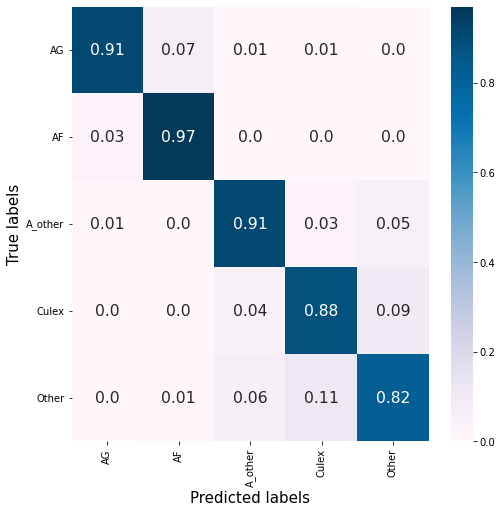

In [ ]:
import seaborn as sn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
species_all = ["AG",
        "AF",
        "A_other",
        "Culex",
        "Other"]
# print classification report
print(classification_report(test_df['label'], out))

# make confusion matrix
conf_mat = confusion_matrix(test_df['label'], out)
conf_mat = conf_mat / np.expand_dims(conf_mat.astype(np.float64).sum(axis=1),1)
conf_mat = np.round(conf_mat, decimals=2)
fig = plt.figure(figsize=(8,8))
ax = plt.subplot()
hm = sn.heatmap(conf_mat, annot=True, ax = ax, cmap="PuBu", fmt='.2', annot_kws={"size": 35 / np.sqrt(len(conf_mat))})
ax.set_yticklabels(hm.get_yticklabels(), rotation=90)
ax.set_xlabel('Predicted labels', fontsize = 15);ax.set_ylabel('True labels', fontsize = 15); 
ax.xaxis.set_ticklabels(species_all); ax.yaxis.set_ticklabels(species_all)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.savefig('drive/MyDrive/pretrain_data_path/pretrain_Inception3.jpg')
plt.show();


In [ ]:
torch.save(model.state_dict(), \
               'drive/MyDrive/pretrain_data_path/Pretrain_state_dict_Inception.pt')